In [74]:
#importing Imp libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [75]:
#reading csv Files
transactions_sales = pd.read_csv(
    "transactions.csv",
    parse_dates=['date'],
    index_col='date',
).to_period('D')
transaction_sales = transactions_sales.loc[:, 'transactions']

train_sales = pd.read_csv(
   'train.csv',
    dtype=dtype,
    parse_dates=['date'],
    infer_datetime_format=True,
)
train_sales = train_sales.set_index('date').to_period('D')
train_sales = train_sales.set_index(['store_nbr', 'family'], append=True)
average_sales = train_sales.groupby('date').mean()['sales']
average_transactions = transactions_sales.groupby('date').mean()['transactions']

In [76]:
# sum of all the sales of diff family
df = transactions_sales.groupby(['date']).agg({"transactions" : "sum"}).reset_index()
df.transactions = (df.transactions.round())
print(df)


            date  transactions
0     2013-01-01           770
1     2013-01-02         93215
2     2013-01-03         78504
3     2013-01-04         78494
4     2013-01-05         93573
...          ...           ...
1677  2017-08-11         89551
1678  2017-08-12         89927
1679  2017-08-13         85993
1680  2017-08-14         85448
1681  2017-08-15         86561

[1682 rows x 2 columns]


<AxesSubplot:>

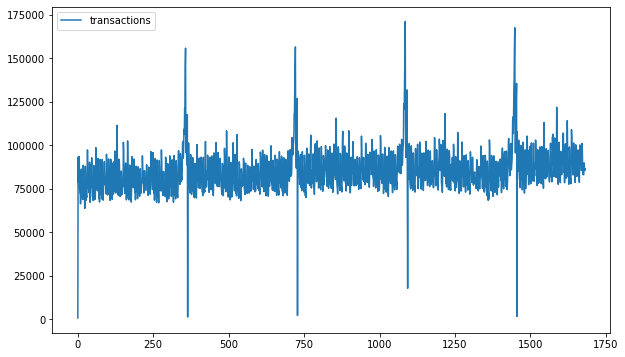

In [77]:
df.plot()

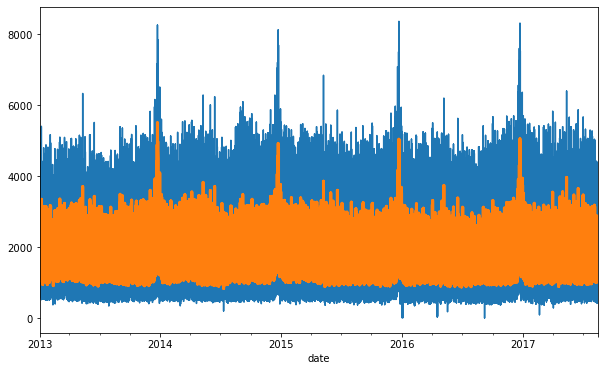

In [78]:
#checking trend
trend = transaction_sales.rolling(
    window=12,
    center=True,
    min_periods=6,
).mean()
ax = transaction_sales.plot()
ax = trend.plot(ax=ax, linewidth=3)

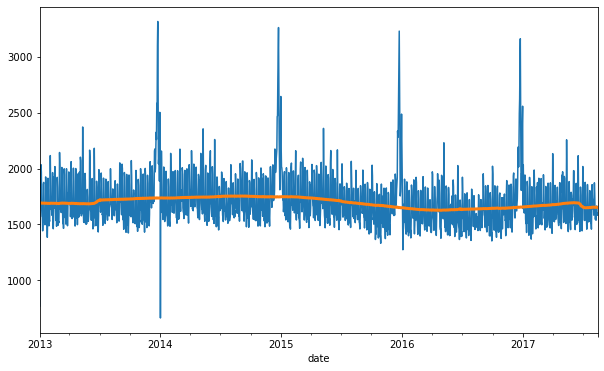

In [79]:
#Moving Average Plot
trend = average_transactions.rolling(
    window=365,
    center=True,
    min_periods=183,
).mean()

ax = average_transactions.plot()
ax = trend.plot(ax=ax, linewidth=3)

In [80]:
from statsmodels.tsa.deterministic import DeterministicProcess

y = average_transactions.copy()  # the target

# Instantiate `DeterministicProcess` with arguments appropriate for a cubic trend model
dp = DeterministicProcess(index=y.index, order=3)

# Create the feature set for the dates given in y.index
X = dp.in_sample()

# Create features for a 90-day forecast.
X_fore = dp.out_of_sample(steps=90)

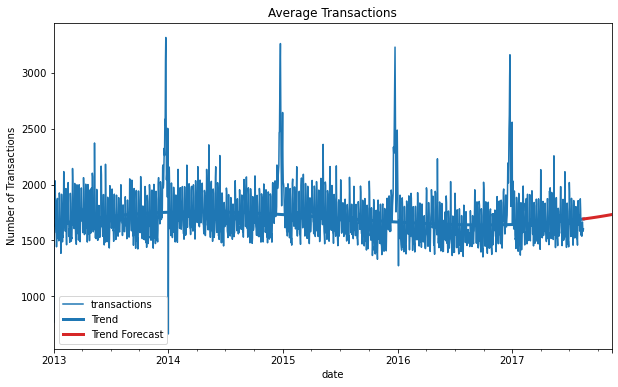

In [81]:
#linear Regression Model
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(title="Average Transactions", ylabel="Number of Transactions")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();

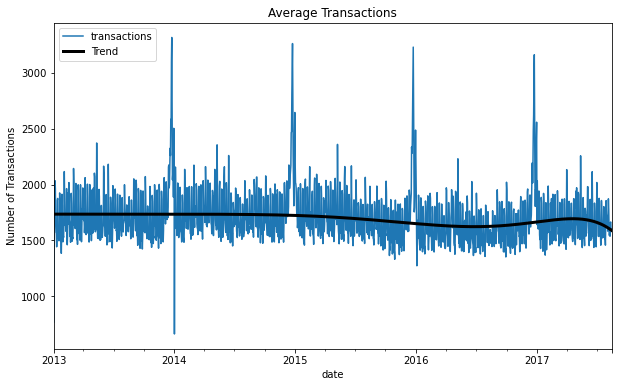

In [82]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(index=y.index, order=11) #Using an order 11 polynomial
X = dp.in_sample()

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

ax = y.plot(title="Average Transactions", ylabel="Number of Transactions")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='0')
ax.legend();

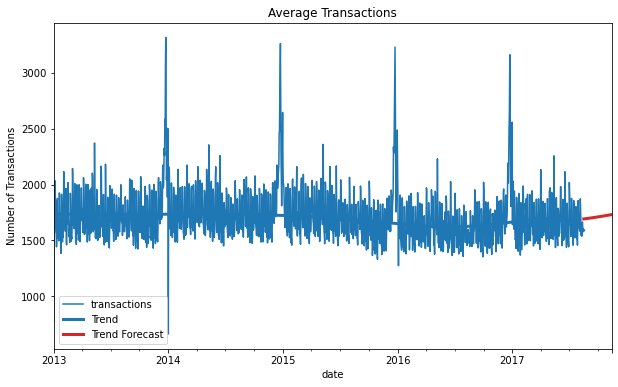

In [85]:
X_forecasting = dp.out_of_sample(steps=90)
y_forecasting = pd.Series(model.predict(X_forecasting), index=X_fore.index)

ax = y.plot(title="Average Transactions", ylabel="Number of Transactions")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();

In [86]:
data_path = "sample_submission.csv"
data = pd.read_csv(data_path)

pred_data = pd.DataFrame({'pred':y_pred}).reset_index()

output = pd.DataFrame({'id': data.id, 'sales': pred_data.pred})
output['sales'].fillna(float(output['sales'].mean()), inplace=True)

output.to_csv('submission.csv', index=False)

In [87]:
output

,id,sales
0,3000888,1735.372274
1,3000889,1735.372274
2,3000890,1735.372274
3,3000891,1735.372274
4,3000892,1735.372274
...,...,...
28507,3029395,1695.527796
28508,3029396,1695.527796
28509,3029397,1695.527796
28510,3029398,1695.527796
